In [1]:
from time import time

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LGR
# from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(
            "D:\\Python\\Dimensionality reduction\\loan-defaulter\\dataset\\application_data.csv")
data.shape

(307511, 122)

In [4]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
data=data.dropna()
data.shape

(8602, 122)

In [7]:
label_encoder = preprocessing.LabelEncoder()
for k, v in data.dtypes.items():
    if v not in ["int32", "int64", "float64"]:
        # print("For k "+k)
        # print(train[k].unique())
        data[k] = label_encoder.fit_transform(data[k])
        # print(train[k].unique())

In [8]:
target_column_name="TARGET"
drop_column_array=["SK_ID_CURR"]
print(data.columns)
target=data[target_column_name]
data = data.drop(target_column_name, axis=1)
for col in drop_column_array:
    data = data.drop(col, axis=1)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [9]:
# new_data, dump, new_target, dump2=train_test_split(data, target, test_size = 0.975)
# new_data.shape
new_data=data
new_target=target
new_data.shape , new_target.shape

((8602, 120), (8602,))

In [10]:
feature_names = tuple(data.columns)
start_time = time()
sfs1 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=10000),
    k_features='best',
    forward=True,
    floating=False,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs1 = sfs1.fit(new_data, new_target, custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished

[2022-07-19 23:33:56] Features: 1/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:    1.4s finished

[2022-07-19 23:33:57] Features: 2/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    1.8s finished

[2022-07-19 23:33:59] Features: 3/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    7.2s finished

[2022-07-19 23:36:04] Features: 28/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    7.8s finished

[2022-07-19 23:36:12] Features: 29/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    8.8s finished

[2022-07-19 23:36:21] Features: 30/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    7.2s finished

[2022-07-19 23:36:28] Features: 

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    7.2s finished

[2022-07-19 23:39:50] Features: 56/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    7.0s finished

[2022-07-19 23:39:57] Features: 57/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    6.8s finished

[2022-07-19 23:40:04] Features: 58/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    6.8s finished

[2022-07-19 23:40:11] Features: 

[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    4.7s finished

[2022-07-19 23:42:48] Features: 84/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.6s finished

[2022-07-19 23:42:53] Features: 85/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.6s finished

[2022-07-19 23:42:58] Features: 86/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    4.4s finished

[2022-07-19 23:43:02] Features: 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s finished

[2022-07-19 23:44:37] Features: 112/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s finished

[2022-07-19 23:44:39] Features: 113/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s finished

[2022-07-19 23:44:41] Features: 114/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.3s finished

[2022-07-19 23:44:42] Feature

In [11]:
print("Selected features")
print(sfs1.k_feature_names_)
features_list = np.array(sfs1.k_feature_names_)
print("Selected features shape ", features_list.shape)
print("Time taken ", (time() - start_time), " seconds")
print("Accuracy ",sfs1.k_score_)

Selected features
('NAME_CONTRACT_TYPE',)
Selected features shape  (1,)
Time taken  697.114734172821  seconds
Accuracy  0.9388514299000232


c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


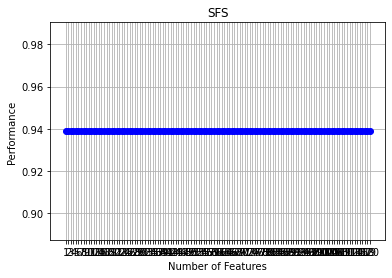

In [12]:
plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SFS")
plt.grid()
plt.show()

In [13]:
feature_names = tuple(data.columns)
start_time_2 = time()
sfs2 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=False,
    floating=False,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs2 = sfs2.fit(new_data, new_target, custom_feature_names=feature_names)
print("Time taken ", (time() - start_time_2), " seconds")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   28.1s finished

[2022-07-19 23:46:43] Features: 119/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:   27.9s finished

[2022-07-19 23:47:11] Features: 118/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:   26.3s finished

[2022-07-19 23:47:37] Features: 117/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   13.1s finished

[2022-07-19 23:56:08] Features: 92/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   12.8s finished

[2022-07-19 23:56:21] Features: 91/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   12.3s finished

[2022-07-19 23:56:34] Features: 90/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   11.8s finished

[2022-07-19 23:56:46] Features: 89/1 -

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    7.5s finished

[2022-07-20 00:00:55] Features: 64/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    7.6s finished

[2022-07-20 00:01:03] Features: 63/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    7.5s finished

[2022-07-20 00:01:10] Features: 62/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    7.2s finished

[2022-07-20 00:01:18] Features: 61/1 -

[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    3.4s finished

[2022-07-20 00:03:26] Features: 36/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.5s finished

[2022-07-20 00:03:30] Features: 35/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    3.2s finished

[2022-07-20 00:03:33] Features: 34/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.3s finished

[2022-07-20 00:03:37] Features: 33/1 -

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2022-07-20 00:04:13] Features: 8/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-07-20 00:04:13] Features: 7/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-07-20 00:04:13] Features: 6/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Time taken  1079.1728825569153  seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-07-20 00:04:13] Features: 5/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-07-20 00:04:13] Features: 4/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-07-20 00:04:13] Features: 3/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-07-20 00:04:13] Features: 2/1 -- sc

In [14]:
print("Selected features")
print(sfs2.k_feature_names_)
features_list_2 = np.array(sfs2.k_feature_names_)
print("Selected features shape ", features_list_2.shape)
print("Accuracy ",sfs2.k_score_)

Selected features
('NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS

c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


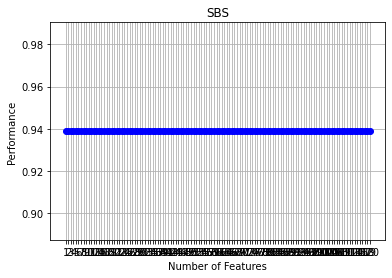

In [15]:
plot_sfs(sfs2.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SBS")
plt.grid()
plt.show()

In [16]:
feature_names = tuple(data.columns)
start_time_3 = time()
sfs3 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=True,
    floating=True,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs3 = sfs3.fit(new_data, new_target, custom_feature_names=feature_names)
print("Time taken ", (time() - start_time_3), " seconds")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished

[2022-07-20 00:05:53] Features: 1/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-20 00:05:54] Features: 2/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2022-07-20 00:06:45] Features: 17/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.1s finished

[2022-07-20 00:06:52] Features: 18/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    3.0s finished

[2022-07-20 00:09:17] Features: 33/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    3.2s finished

[2022-07-20 00:09:29] Features: 34/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    4.8s finished

[2022-07-20 00:12:36] Features: 49/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    5.2s finished

[2022-07-20 00:12:49] Features: 50/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    7.7s finished

[2022-07-20 00:16:18] Features: 65/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    8.0s finished

[2022-07-20 00:16:33] Features: 66/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   10.5s finished

[2022-07-20 00:20:29] Features: 81/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   11.1s finished

[2022-07-20 00:20:45] Features: 82/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   17.2s finished

[2022-07-20 00:25:23] Features: 97/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   17.5s finished

[2022-07-20 00:25:44] Features: 98/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]:

[Parallel(n_jobs=1)]: Done 111 out of 111 | elapsed:   24.3s finished

[2022-07-20 00:31:11] Features: 112/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:   25.4s finished

[2022-07-20 00:31:38] Features: 113/120 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1

Time taken  1736.692143201828  seconds


[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:   28.2s finished

[2022-07-20 00:34:49] Features: 120/120 -- score: 0.9388514299000232

In [17]:
print("Selected features")
print(sfs3.k_feature_names_)
features_list_3 = np.array(sfs3.k_feature_names_)
print("Selected features shape ", features_list_3.shape)
print("Accuracy ",sfs3.k_score_)

Selected features
('NAME_CONTRACT_TYPE',)
Selected features shape  (1,)
Accuracy  0.9388514299000232


c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


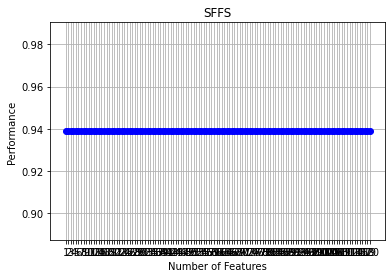

In [18]:
plot_sfs(sfs3.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SFFS")
plt.grid()
plt.show()

In [19]:
feature_names = tuple(data.columns)
start_time_4 = time()
sfs4 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=False,
    floating=True,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs4 = sfs4.fit(new_data, new_target, custom_feature_names=feature_names)
print("Time taken ", (time() - start_time_4), " seconds")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   29.1s finished

[2022-07-20 00:35:19] Features: 119/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:   28.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2022-07-20 00:35:48] Features: 118/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   19.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.9s finished

[2022-07-20 00:42:27] Features: 103/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.2s finished

[2022-07-20 00:42:50] Features: 102/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    4.3s finished

[2022-07-20 00:47:36] Features: 87/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    4.4s finished

[2022-07-20 00:47:52] Features: 86/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    6.1s finished

[2022-07-20 00:51:46] Features: 71/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    6.3s finished

[2022-07-20 00:52:01] Features: 70/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    6.9s finished

[2022-07-20 00:55:36] Features: 55/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    7.3s finished

[2022-07-20 00:55:50] Features: 54/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.7s finished

[2022-07-20 00:59:00] Features: 39/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    8.1s finished

[2022-07-20 00:59:12] Features: 38/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    7.1s finished

[2022-07-20 01:01:53] Features: 23/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    7.1s finished

[2022-07-20 01:02:02] Features: 22/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    2.3s finished

[2022-07-20 01:03:27] Features: 7/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 113 out of 113 | elapsed:    1.9s finished

[2022-07-20 01:03:29] Features: 6/1 -- score: 0.9388514299000232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using

Time taken  1729.0179643630981  seconds


[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    1.4s finished

[2022-07-20 01:03:39] Features: 1/1 -- score: 0.9388514299000232

In [20]:
print("Selected features")
print(sfs4.k_feature_names_)
features_list_4 = np.array(sfs4.k_feature_names_)
print("Selected features shape ", features_list_4.shape)
print("Accuracy ",sfs4.k_score_)

Selected features
('NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS

c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


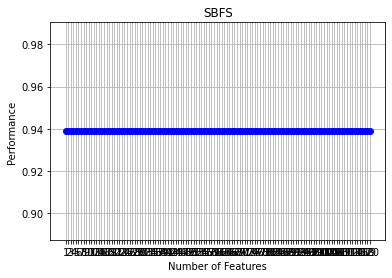

In [21]:
plot_sfs(sfs4.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SBFS")
plt.grid()
plt.show()